In [1]:
#!pip install holoviews
#!pip install bokeh
#!pip install seaborn

Prominent tools for visualizing data in the field of data science include `matplotlib` and `seaborn`, where `seaborn` is actually built on top of `matplotlib`. These tools are commonly employed during the exploration of data. For creating interactive visualizations, you have options like `bokeh` and `holoview`, with `holoview` using the capabilities of `bokeh`. Visualizations represent images that are displayed either in a web browser, on a screen, or as a file. Typically, we need to instruct the computer where these images should be displayed, referred to as the **backend layer**. Notably, the interactive images produced by `bokeh` and `holoview` are essentially converted into JavaScript objects.

Visualizations consist of various elements (text, axes, titles, ticks, lines, circles, labels, legends), each offering a way to modify their properties, such as their shape, color, or thickness. All these elements together form a **figure**. Some libraries require initializing a figure using a `figure()` method. Then, elements like titles, labels, and data points are added to compose the figure. Once the figure is ready, it can be displayed in the desired output or rendering environment. Most libraries use a method like `show()` for this purpose. To simplify the creation of standard plots, many libraries offer a **scripting layer**, providing an interface to create default compositions like bar charts or scatterplots.

In `bokeh`, these default compositions are referred to as `bokeh.models`.

### matplotlib and seaborn
Jupyter has some specialized support for matplotlib and this is enabled by using the IPython magic `%matplotlib notebook` for dynamic plots or `%matplotlib inline` for static plots. It configures matplotlib to render into the browser. Because seaborn is built on top of matplotlib we can use the same IPython magic command. 


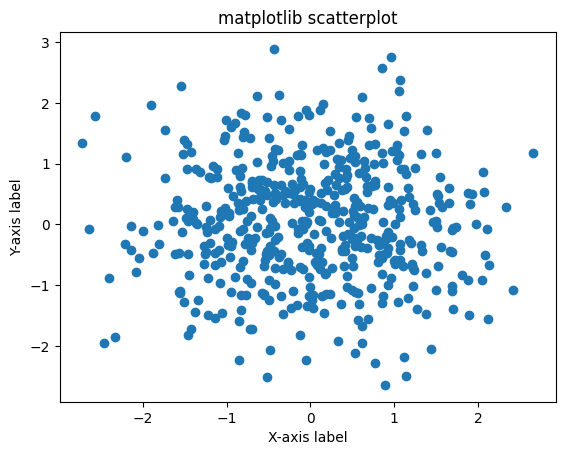

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(500)
y = np.random.randn(500)

# Creating a matplotlib scatter plot using matplotlib interface for scatterplot
plt.scatter(x, y)

# modfiy elements
plt.title('matplotlib scatterplot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# render 
plt.show()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

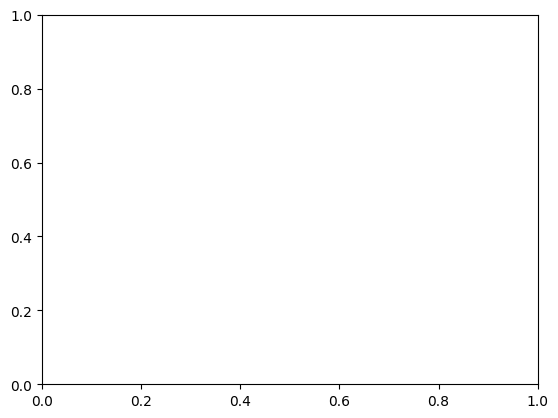

In [3]:
ax = plt.gca() #get access to the axes
ax.get_children()

This representation includes various elements such as spines (the borders of the plot area), X and Y axes, text elements, and a rectangle patch. The values like 0x163f61180 and 0x163f61270 are memory addresses or references within the computer's memory where these elements are stored.

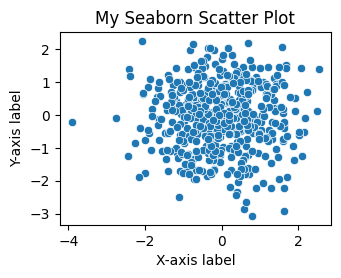

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generating random data
x = np.random.randn(500)
y = np.random.randn(500)

#initialize figure
plt.figure(figsize=(3.5, 2.5))  # Set width=3.5 inches, height= 2.5 inches

# Creating a Seaborn scatter plot using seaborn interface for scatterplot
sns_plot = sns.scatterplot(x=x, y=y)

# Adding title and labels using Matplotlib
plt.title('My Seaborn Scatter Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Displaying the Seaborn scatter plot
plt.show()

### bokeh 
For `bokeh` we use `output_notebook()` method to render into the notebook browser. But we can also create a new html file with `output_file()`. 


In [5]:
from bokeh.io import output_file, output_notebook
output_notebook()

Loading BokehJS ...

In [6]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data = {'x':np.random.randn(500), 'y':np.random.randn(500)})

# initialize the bokeh figure
p = figure(
    title="Bokeh example",
    width=350,
    height=250,
    x_axis_label="X-axis label",
    y_axis_label="Y-axis label"
)

# adding scatter plot using bokeh interface for scatter (circle)
p.circle(x='x', y='y', source=source)

# render figure
show(p)

In [7]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()

from bokeh.plotting import figure, show
from bokeh.models import FixedTicker
import numpy as np

languages = ['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [28.09, 4.53, 15.81, 6.8, 8.93]

p = figure(height=350, width=500, 
           title='5 Languages for Math & Data\nby % popularity on Stack Overflow', 
           y_axis_label="% popularity")

# change the bar color to be less bright blue
p.vbar(x=pos, top=popularity, width=0.5, color='lightslategrey')

# change one bar, the Python bar, to a contrasting color
p.vbar(x=pos[0], top=popularity[0], width=0.5, color='#1F77B4')

# Setting language names as x-axis ticks
p.xaxis.ticker = FixedTicker(ticks=list(pos))
p.xaxis.major_label_overrides = {int(x): str(languages[int(x)]) for x in pos}

# softening labels by setting transparency
p.xaxis.axis_label_text_alpha = 0.8
p.yaxis.axis_label_text_alpha = 0.8
p.title.text_alpha = 0.5

# remove gridlines and ticks
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.major_label_orientation = 1.2

show(p)

Loading BokehJS ...

When you use `output_file` you can render the plot to a seperate HTML file. Bokeh creates the HTML file when you call the show() function. This function also automatically opens a web browser to display the HTML file.

In [8]:
# set output to static HTML file
output_file(filename="custom_filename.html", title="HTML file")
show(p)

### holoview
HoloViews works well with Jupyter Notebooks by default, and the visualizations are displayed inline. We can connect the 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
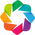

In [9]:
import holoviews as hv
hv.extension('bokeh')  # Use the 'bokeh' backend for interactivity (can change to 'matplotlib' or other supported backends)

In [10]:
import holoviews as hv
import numpy as np

# Generating random data
x = np.random.randn(500)
y = np.random.randn(500)

# Creating a Holoviews Points element (scatter plot) using the holoview interface
scatter = hv.Points((x, y))

# customize scatter plot using holoview interface
scatter = scatter.opts(title='holoview example', width=350, height=250)

# render the figure
scatter

:Points   [x,y]

In [15]:
#bokeh layouts
p1 = figure(
    title="Bokeh example",
    width=350,
    height=250,
    x_axis_label="X-axis label",
    y_axis_label="Y-axis label"
)
# adding scatter plot using bokeh interface for scatter (circle)
p1.circle(x='x', y='y', source=source)

languages = ['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [28.09, 4.53, 15.81, 6.8, 8.93]

p2 = figure(height=350, width=500, 
           title='5 Languages for Math & Data\nby % popularity on Stack Overflow', 
           y_axis_label="% popularity")

# change the bar color to be less bright blue
p2.vbar(x=pos, top=popularity, width=0.5, color='lightslategrey')

# change one bar, the Python bar, to a contrasting color
p2.vbar(x=pos[0], top=popularity[0], width=0.5, color='#1F77B4')


from bokeh.layouts import column, row

# plots in a 'row' layout

    column_layout = row(p1, p2)

# output the plot
show(column_layout)